#### Import Required Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

#### Read in Automobiles Dataset

In [30]:
df = pd.read_csv("automobiles.csv", index_col=0, na_values=["?"])

# Drop rows with missing value for price, horsepower, curb-weight, engine-size, and highway-mpg
df.dropna(subset=["price", "horsepower", "curb-weight", "engine-size", "highway-mpg"], axis=0, inplace = True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Simple Linear Model

In [24]:
# Create linear regression object
lm = LinearRegression()

# Define predictor and target variables
X = df[["highway-mpg"]]
Y = df["price"]

# Fit the model using the sample data
lm.fit(X, Y)

# Optain a prediction
Yhat = lm.predict(X)

print("Intercept: ", lm.intercept_)
print("Slop:      ", lm.coef_)
print("Y-hat:\n", Yhat)

Intercept:  38423.30585815743
Slop:       [-821.73337832]
Y-hat:
 [16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508 17879.97140011 17879.97140011 17879.97140011
 21988.63829172 14593.03788682 14593.03788682 15414.77126514
 15414.77126514 17879.97140011 20345.17153508 20345.17153508
 21988.63829172 -5128.5631929   3088.77059031  3088.77059031
  4732.23734696  7197.43748192 13771.3045085   7197.43748192
  7197.43748192  7197.43748192 13771.3045085  13771.3045085
 18701.70477843 -5950.29657123  7197.43748192  3910.50396864
 10484.37099521 10484.37099521 10484.37099521 10484.37099521
 11306.10437353 11306.10437353 11306.10437353 11306.10437353
 15414.77126514 12949.57113018 14593.03788682 14593.03788682
 22810.37167004 22810.37167004 24453.83842668 12949.57113018
  7197.43748192  7197.43748192  7197.43748192  7197.43748192
 19523.43815675 19523.43815675 19523.43815675 19523.43815675
 12127.83775186 12127.83775186 12127.83775186 12127.83775186
  3910.50396864 12127

### Multiple Linear Regression

In [32]:
# Store 4 predictor variables in Z
z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
Y = df["price"]

# Fit the model using the sample data
lm.fit(z, Y)

# Optain a prediction
Yhat = lm.predict(z)

print("Intercept: ", lm.intercept_)
print("Slop:      ", lm.coef_)
print("Y-hat:\n", Yhat)

Intercept:  -15700.573979039282
Slop:       [53.27878556  4.66217408 82.22948394 35.5175845 ]
Y-hat:
 [13741.39845627 13741.39845627 19088.01516843 10657.90424705
 15557.06262444 13919.31226826 15490.46493163 16003.3040799
 17628.33928255 10757.28448941 10757.28448941 17860.77855061
 18117.19812475 19362.67585307 27022.3362595  27721.66237079
 28233.3989612    692.55325105  5693.76491579  5856.94100842
  5525.49652381  5418.9437703   8778.98554196  5843.20161115
  5945.76944081  5945.76944081  9072.70250871 11904.09500729
 18810.44277621  4858.96186031  5743.88910041  4048.43471151
  6165.94182551  6240.53661071  6492.29401078  6557.56444783
  9523.34633387  9770.44155986  9840.37417099 10157.4020081
 11212.57805806 10463.95808505  9508.15477689 12656.21918307
 34522.93303266 34522.93303266 44084.66613744  5317.82059978
  5613.06543205  5636.37630243  5822.86326544  5846.17413581
  7349.5259815   7349.5259815   7372.83685187 10542.76041912
 11062.68892275 11179.24327463 11062.68892275 

## Model Evaluation using Visualization

### Regression Plot

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 48323.77073452915)

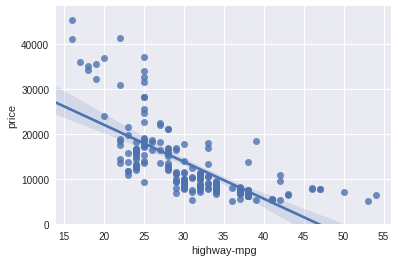

In [39]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

### Residual Plot

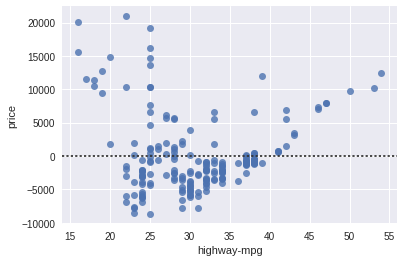

In [41]:
sns.residplot(df["highway-mpg"], df["price"])

### Distribution Plot

In [ ]:
ax1 = sns.distplot(df["price"], hist=False, color="r", label="Actual")

sns.distplot(Yhat, hist=False, color="b", label="Fitted")